In [1]:
getwd()

[1] "d:/workspace/R_practice"

In [2]:
setwd('d:/workspace/R_practice/data/R_data')

In [3]:
nrow(iris)

[1] 150

In [4]:
iris_train = iris[1:105,]
iris_test = iris[106:150,]
nrow(iris_train)

[1] 105

In [5]:
nrow(iris_test)

[1] 45

In [6]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [7]:
idx = sample(1:nrow(iris), size = nrow(iris)*0.7, replace = F)
idx

[1] 118 130  15  63  75  69  37  23  61 138 148 143  35  68  94   4  25  67
 [19]  54 122  51  32  71  81  64  95 142 120 111  55  79  60 110  99   5 119
 [37]  72  85 132  27  65  62  52  31 105 107 131   1   8  50  48 114 137 150
 [55] 124  53  10 100  16  38 145 134 121  45  11  57 126  43 136 144  96  21
 [73]  42  98  89 146  56  97  28 129 149  59  49  29  41 112  80 127  93 140
 [91]  17 102  74 141  58  12  13  76  84  22  47 106   2  34  19

In [8]:
iris_train = iris[idx,]
iris_test = iris[-idx,]
nrow(iris_train)

[1] 105

In [9]:
nrow(iris_test)

[1] 45

In [10]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In [11]:
table(iris_train$Species)


    setosa versicolor  virginica 
        34         37         34 

In [12]:
table(iris_test$Species)


    setosa versicolor  virginica 
        16         13         16 

In [13]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [14]:
train.idx = createDataPartition(iris$Species, p = 0.7, list = F)
iris_train = iris[train.idx,]
table(iris_train$Species)


    setosa versicolor  virginica 
        35         35         35 

In [15]:
iris_test = iris[-train.idx,]
table(iris_test$Species)


    setosa versicolor  virginica 
        15         15         15 

# Naive Bayes Model Method

In [16]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [17]:
naive.result = naiveBayes(iris_train, iris_train$Species, laplace = 1)
naive.pred = predict(naive.result, iris_test, type = 'class')

In [18]:
table(naive.pred, iris_test$Species)

            
naive.pred   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0        15

In [19]:
confusionMatrix(naive.pred, iris_test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0        15

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9213, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

# Logistic Regression Method

In [20]:
library(nnet)

In [21]:
multi.result = multinom(Species ~ ., iris_train)

# weights:  18 (10 variable)
initial  value 115.354290 
iter  10 value 13.594446
iter  20 value 5.961566
iter  30 value 5.653792
iter  40 value 5.572346
iter  50 value 5.565544
iter  60 value 5.560137
iter  70 value 5.559345
iter  80 value 5.558288
final  value 5.558220 
converged


In [22]:
multi.pred = predict(multi.result, iris_test)

In [23]:
table(multi.pred, iris_test$Species)

            
multi.pred   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0        15

In [24]:
confusionMatrix(multi.pred, iris_test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0        15

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9213, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

# Decision Tree model mothod

In [25]:
library(rpart)

In [26]:
rpart.result = rpart(Species ~ ., data = iris_train)
rpart.pred = predict(rpart.result, iris_test, type = 'class')

In [27]:
table(rpart.pred, iris_test$Species)

            
rpart.pred   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

In [28]:
confusionMatrix(rpart.pred, iris_test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9667          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9333
Specificity                 1.0000            0.9667           1.0000
Pos Pred Value              1.0000            0.9375           1.0000
Neg Pred Value              1.0000            1.0000           0.9677
P

In [29]:
install.packages('rpart.plot')

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\14\AppData\Local\Temp\RtmpmqPG20\downloaded_packages


In [30]:
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

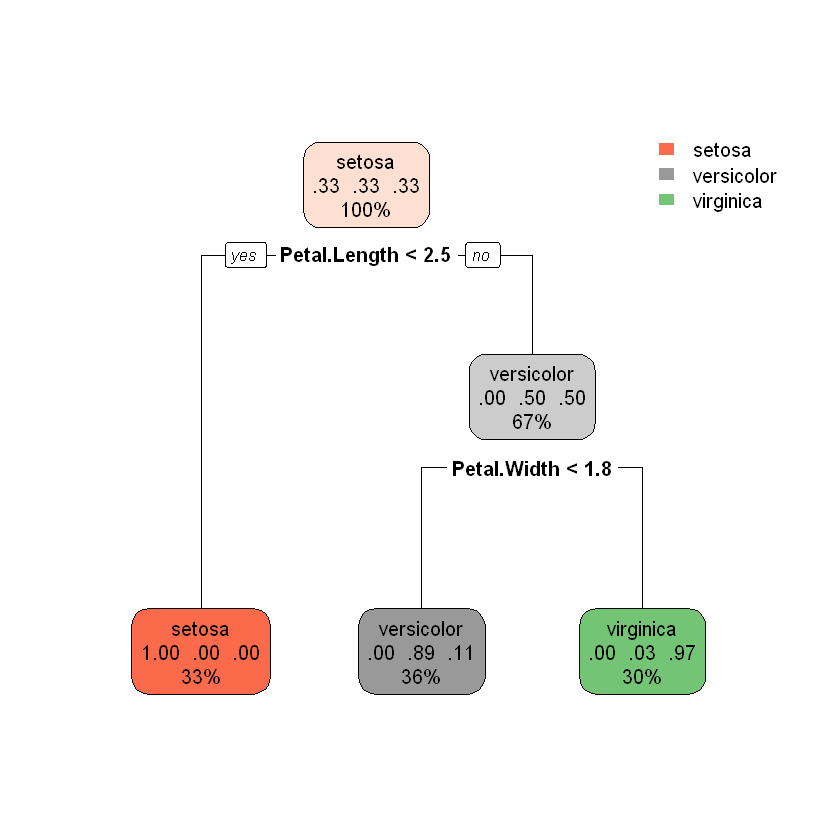

In [31]:
rpart.plot(rpart.result)

# ANN Model Method

In [32]:
library(nnet)

In [33]:
iris_train_scale = as.data.frame(sapply(iris_train[, -5], scale))
iris_test_scale = as.data.frame(sapply(iris_test[,-5], scale))

In [35]:
head(iris_test_scale)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-1.0373780,1.17790419,-1.306740,-1.261191
-1.7964350,-0.43531242,-1.306740,-1.261191
-1.1638875,0.02560661,-1.251422,-1.386199
-1.2903970,-0.20485290,-1.306740,-1.386199
-1.9229445,-0.20485290,-1.472695,-1.386199
-0.0253019,2.09974225,-1.417376,-1.261191


In [36]:
iris_train_scale$Species = iris_train$Species
iris_test_scale$Species = iris_test$Species
head(iris_train_scale)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
-0.8892301,1.0413559,-1.342107,-1.328033,setosa
-1.1253089,-0.1000050,-1.342107,-1.328033,setosa
-1.3613877,0.3565394,-1.399067,-1.328033,setosa
-1.4794271,0.1282672,-1.285146,-1.328033,setosa
-0.5351119,1.9544446,-1.171224,-1.061156,setosa
-1.4794271,0.8130838,-1.342107,-1.194594,setosa


In [37]:
nnet.result = nnet(Species ~ ., iris_train_scale, size = 3)
nnet.pred = predict(nnet.result, iris_test_scale, type = 'class')
table(nnet.pred, iris_test_scale$Species)

# weights:  27
initial  value 123.888212 
iter  10 value 7.756620
iter  20 value 5.356165
iter  30 value 4.873881
iter  40 value 4.571852
iter  50 value 4.483041
iter  60 value 4.471656
iter  70 value 4.467415
iter  80 value 4.464852
iter  90 value 4.463916
iter 100 value 4.463402
final  value 4.463402 
stopped after 100 iterations


            
nnet.pred    setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

In [39]:
confusionMatrix(nnet.pred, iris_test$Species)

ERROR: Error: `data` and `reference` should be factors with the same levels.


# svm model method

In [41]:
install.packages('kernlab')

package 'kernlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\14\AppData\Local\Temp\RtmpmqPG20\downloaded_packages


In [43]:
library(kernlab)

In [47]:
svm.result = ksvm(Species ~ ., data = iris_train, kernel = 'rbfdot')
svm.pred = predict(svm.result, iris_test, type = 'response')

In [45]:
table(sv.pred, iris_test$Species)

            
sv.pred      setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

In [48]:
confusionMatrix(svm.pred, iris_test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9667          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9333
Specificity                 1.0000            0.9667           1.0000
Pos Pred Value              1.0000            0.9375           1.0000
Neg Pred Value              1.0000            1.0000           0.9677
P

# Random Forest Method

In [50]:
library(randomForest)

In [52]:
rf.result = randomForest(Species ~ ., data = iris_train, ntree = 500)
rf.pred = predict(rf.result, iris_test, type = 'response')

In [53]:
table(rf.pred, iris_test$Species)

            
rf.pred      setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

In [54]:
confusionMatrix(rf.pred, iris_test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9667          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9333
Specificity                 1.0000            0.9667           1.0000
Pos Pred Value              1.0000            0.9375           1.0000
Neg Pred Value              1.0000            1.0000           0.9677
P

# Package안의 데이터

In [55]:
data(package = 'MASS')
Boston = as.data.frame(MASS::Boston)

In [56]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [57]:
nrow(Boston)

[1] 506

In [58]:
idx = sample(1:nrow(Boston), size = nrow(Boston)*0.7, replace = F)
idx

[1] 336  31  52 290 448 397 445  96 129 472 155  34 237 283 240  88 253 313
 [19] 432 438 450 161  71 410 467 248 477 202 400 181 232  66 176  33 325 172
 [37] 346 186 289 344 429 406 446 113 112  70 359 466 320 220 366 262 150 274
 [55] 334 280 207 480 136  87  77 308 102 148 259 233 312 231  89 122 173  85
 [73] 310 219 459  84  27 279 119 323  43 463 145 389 430 209 224 395  86 108
 [91] 449 110 178  53 306 328 355 372 139 394 171 276   8 489 183  16 315  75
[109] 479 251 436 484  80 383 249 425 151 437   5  36  14 206 369 364 109 321
[127] 368 116 300 215  44 382 335 261 381 126 342 413 505 414 179 302  79 303
[145] 424 103 239 418 349 423   1  18 371 468 166  72 501 203 217 287  24 168
[163] 260  29  99  19   6 128 201 228 218  83 478  30 419 331  45 401 362 292
[181] 407 174  49 130 396 104 370 314 208 494 476 421 403   4 127 398 246 356
[199] 141 190 417 411 481 457 309 458  92   9  15 475 307 154 318  58 149 491
[217] 175 297 267  65 281 487 322  81 111  90 124 358 268 243 242 137  37 188
[235] 252 195 198 210 214 354 433 146 326 443 263 177 498  38 216 431 311 105
[253] 162 427 245  73  48  10 485 387 441 347 266 469 375 191 426 182 332 361
[271]   2  12 226 277 184 123  26 211 455  91 348 282 189 147  21 360 295 160
[289] 490 278 132 317 298 156  78 465 304 402  56 483 138 338  60 169 258 255
[307] 399 327 352 376  55 374 319 118  35 428 470 499  46 212 461 386 345 453
[325] 340 205 115 225  41  20 264  28 464  68 270 471  13  51  69 114 142 500
[343] 131 486 227 434 164 440 301 390 269 193 333 222

In [60]:
Boston_train = Boston[idx,]
Boston_test = Boston[-idx,]

In [61]:
lm.fit = lm(medv ~ ., data = Boston_train)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4827  -2.5420  -0.4671   1.2640  25.3536 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  38.659985   5.982151   6.463 3.57e-10 ***
crim         -0.129314   0.034608  -3.736 0.000219 ***
zn            0.053107   0.017510   3.033 0.002608 ** 
indus         0.038960   0.074618   0.522 0.601921    
chas          2.779289   1.036013   2.683 0.007660 ** 
nox         -18.490343   4.409837  -4.193 3.52e-05 ***
rm            3.394072   0.506186   6.705 8.39e-11 ***
age           0.014427   0.015844   0.911 0.363176    
dis          -1.378328   0.237912  -5.793 1.57e-08 ***
rad           0.359358   0.080463   4.466 1.09e-05 ***
tax          -0.014874   0.004706  -3.161 0.001714 ** 
ptratio      -0.953650   0.155434  -6.135 2.36e-09 ***
black         0.009048   0.003000   3.016 0.002755 ** 
lstat        -0.535187   0.058142  -9.205  < 2e-16 ***
---
S

In [62]:
lm.fit2 = step(lm.fit, method = 'both')
summary(lm.fit2)

Start:  AIC=1100.67
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

          Df Sum of Sq    RSS    AIC
- indus    1      5.88 7333.7 1099.0
- age      1     17.87 7345.6 1099.5
<none>                 7327.8 1100.7
- chas     1    155.11 7482.9 1106.1
- black    1    196.04 7523.8 1108.0
- zn       1    198.25 7526.0 1108.1
- tax      1    215.35 7543.1 1108.9
- crim     1    300.90 7628.7 1112.9
- nox      1    378.91 7706.7 1116.5
- rad      1    429.89 7757.7 1118.8
- dis      1    723.38 8051.2 1132.0
- ptratio  1    811.29 8139.1 1135.8
- rm       1    968.98 8296.8 1142.6
- lstat    1   1826.09 9153.9 1177.4

Step:  AIC=1098.95
medv ~ crim + zn + chas + nox + rm + age + dis + rad + tax + 
    ptratio + black + lstat

          Df Sum of Sq    RSS    AIC
- age      1     17.29 7350.9 1097.8
<none>                 7333.7 1099.0
- chas     1    168.46 7502.1 1105.0
- zn       1    192.46 7526.1 1106.1
- black    1    194.19 7527.8 


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5001  -2.5851  -0.3407   1.1872  25.9315 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.931958   5.929110   6.398 5.19e-10 ***
crim         -0.129146   0.034543  -3.739 0.000217 ***
zn            0.049927   0.017168   2.908 0.003874 ** 
chas          2.929757   1.019601   2.873 0.004314 ** 
nox         -16.804961   4.060572  -4.139 4.41e-05 ***
rm            3.474306   0.491346   7.071 8.71e-12 ***
dis          -1.460284   0.224056  -6.517 2.56e-10 ***
rad           0.343687   0.076833   4.473 1.05e-05 ***
tax          -0.013743   0.004202  -3.271 0.001182 ** 
ptratio      -0.931738   0.153324  -6.077 3.27e-09 ***
black         0.009177   0.002988   3.071 0.002302 ** 
lstat        -0.511963   0.053440  -9.580  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0

In [64]:
lm.yhat2 = predict(lm.fit2, newdata = Boston_test)
mean((lm.yhat2-Boston_test$medv)^2)

[1] 24.85017

In [65]:
kk = mean((lm.yhat2-Boston_test$medv)^2)
sqrt(kk)

[1] 4.984994

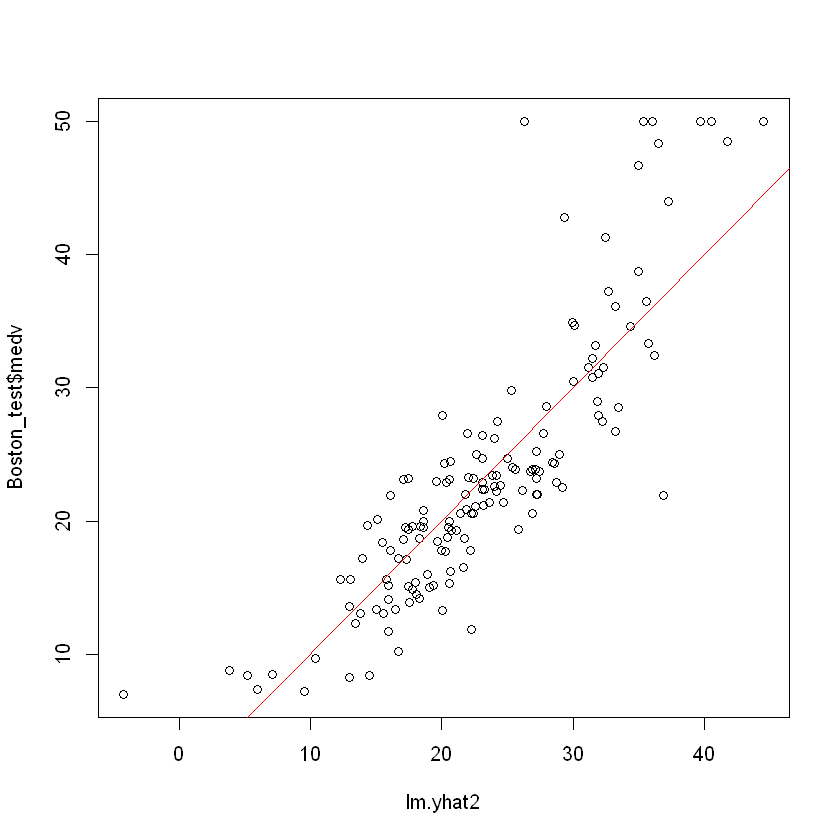

In [66]:
plot(lm.yhat2, Boston_test$medv)
abline(a = 0, b = 1, col = 2)

In [69]:
install.packages('tree')

package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\14\AppData\Local\Temp\RtmpmqPG20\downloaded_packages


In [74]:
library(tree)

In [71]:
tree.fit = tree(medv ~ ., data = Boston_train)
summary(tree.fit)


Regression tree:
tree(formula = medv ~ ., data = Boston_train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"   "nox"  
Number of terminal nodes:  7 
Residual mean deviance:  13.01 = 4516 / 347 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-18.0000  -2.1950  -0.1071   0.0000   2.2800  11.9400 

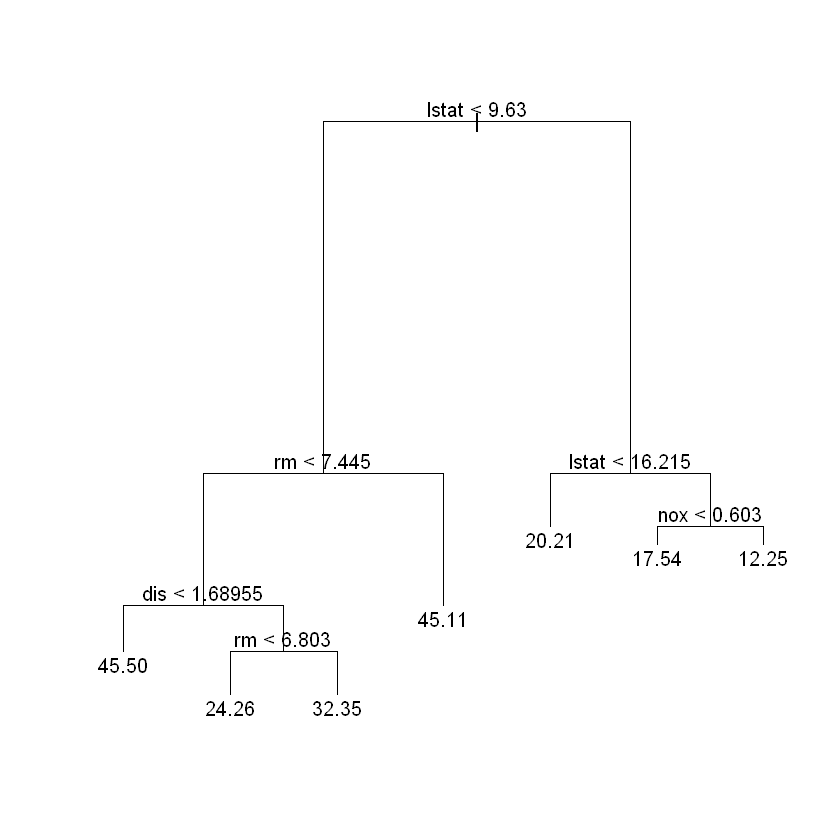

In [75]:
plot(tree.fit)
text(tree.fit, pretty = 0)

In [77]:
tree.yhat = predict(tree.fit, newdata = Boston_test)
mean((tree.yhat-Boston_test$medv)^2)

[1] 18.96014

In [78]:
kk = mean((tree.yhat-Boston_test$medv)^2)
sqrt(kk)

[1] 4.354324

# rpart를 활용한 의사결정트리 분석 방법

In [79]:
library(rpart)

In [80]:
rpart.fit = rpart(medv ~ ., data = Boston_train)
summary(rpart.fit)

Call:
rpart(formula = medv ~ ., data = Boston_train)
  n= 354 

          CP nsplit rel error    xerror       xstd
1 0.45987344      0 1.0000000 1.0040490 0.10108839
2 0.17200027      1 0.5401266 0.6060707 0.06802821
3 0.06904410      2 0.3681263 0.4348375 0.05651588
4 0.05794968      3 0.2990822 0.3910833 0.05358477
5 0.02398269      4 0.2411325 0.3552807 0.05361344
6 0.02328583      5 0.2171498 0.2999158 0.04048218
7 0.01131570      6 0.1938640 0.2831452 0.04174953
8 0.01000000      7 0.1825483 0.2709912 0.04115282

Variable importance
  lstat      rm   indus     nox    crim     age     dis     tax ptratio     rad 
     25      20      15      12      11      11       3       2       2       1 

Node number 1: 354 observations,    complexity param=0.4598734
  mean=22.21893, MSE=80.00233 
  left son=2 (215 obs) right son=3 (139 obs)
  Primary splits:
      lstat   < 9.63     to the right, improve=0.4598734, (0 missing)
      rm      < 6.803    to the left,  improve=0.4421950, (0 missi

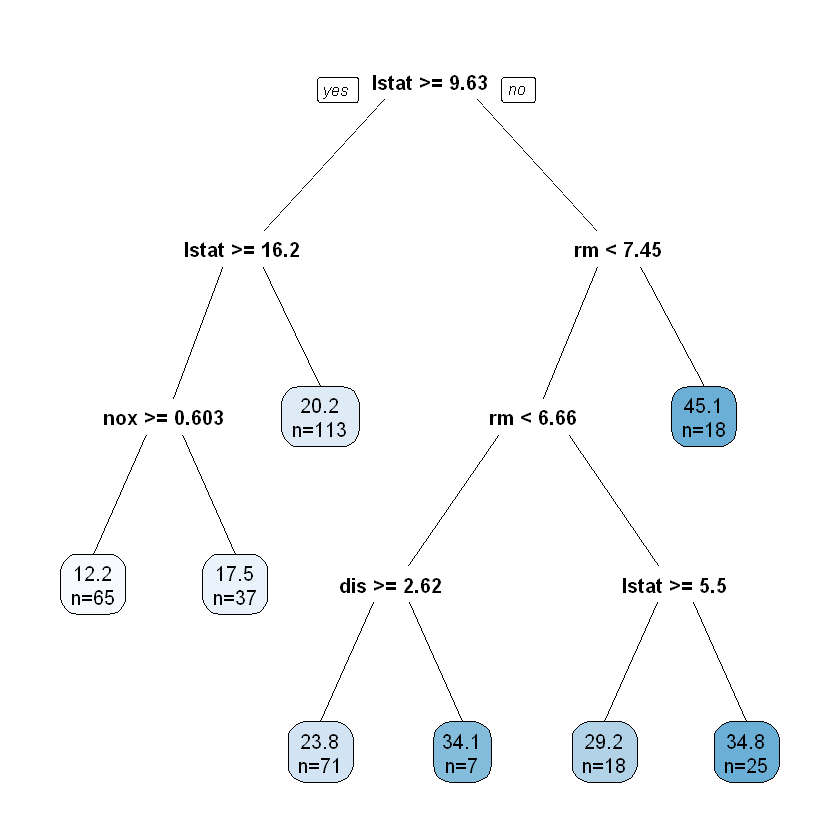

In [85]:
rpart.plot(rpart.fit, digits = 3, type = 0, extra = 1, fallen.leaves = F, cex = 1)

In [87]:
rpart.yhat = predict(rpart.fit, newdata = Boston_test)
kk = mean((rpart.yhat-Boston_test$medv)^2)
sqrt(kk)

[1] 4.914684

# ANN 수치예측모형의 머신러닝 알고리즘 방법

In [88]:
normalize = function(x){return((x-min(x))/max(x)-min(x))}
Boston_train_norm = as.data.frame(sapply(Boston_train, normalize))
Boston_test_norm = as.data.frame(sapply(Boston_test, normalize))

In [89]:
library(nnet)

In [90]:
nnet.fit = nnet(medv ~ ., data = Boston_train_norm, size = 5)
nnet.yhat = predict(nnet.fit, newdata = Boston_test_norm, type = 'raw')

# weights:  76
initial  value 9005.159721 
final  value 7684.211516 
converged


In [91]:
mean((nnet.yhat-Boston_test_norm$medv)^2)

[1] 44.58951

# ANN의 시각화를 위해서 시용하는 알고리즘 방법

In [103]:
install.packages('neuralnet')

Warning message:
"package 'neuralnet' is in use and will not be installed"

In [104]:
library('neuralnet')

In [108]:
neural.fit = neuralnet(medv ~ crim + zn + indus + chas + nox + rm + age + tax + ptratio + black + lstat, data = Boston_train_norm,
                       hidden = 5, act.fct="tanh")

In [109]:
neural.result = compute(neural.fit, Boston_test_norm[1:13])

In [110]:
neural.yhat = neural.result$net.result
mean((neural.yhat-Boston_test_norm$medv)^2)

[1] 4.114304

In [111]:
kk = mean((neural.yhat-Boston_test_norm$medv)^2)
sqrt(kk)

[1] 2.028375

In [116]:
plot(neural.fit)

# RF model(앙상블) Method 수치머신러닝

In [106]:
library('randomForest')

In [107]:
set.seed(1)
# 입력 변수는 6개
rf.fit = randomForest(medv ~ ., data = Boston_train, mtry = 6, importance = T)
rf.fit


Call:
 randomForest(formula = medv ~ ., data = Boston_train, mtry = 6,      importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 10.73175
                    % Var explained: 86.59

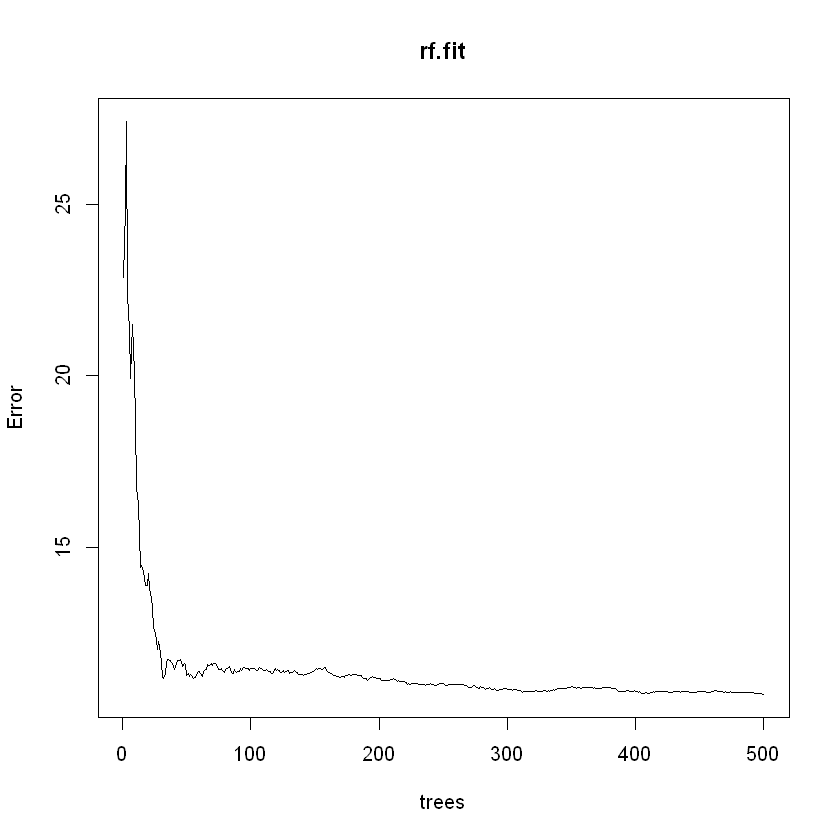

In [117]:
plot(rf.fit)

In [119]:
# 노드를 결정할 때 가장 중요한 요인. 높을수록 중요하다.
importance(rf.fit)

,%IncMSE,IncNodePurity
crim,14.456856,1539.98167
zn,3.127893,132.63237
indus,11.667608,1511.38790
chas,2.411280,61.56089
nox,17.506839,1181.65902
rm,36.382657,8659.73870
age,9.927984,648.85087
dis,14.409945,1740.71168
rad,3.516146,154.56343
tax,13.306229,588.32093


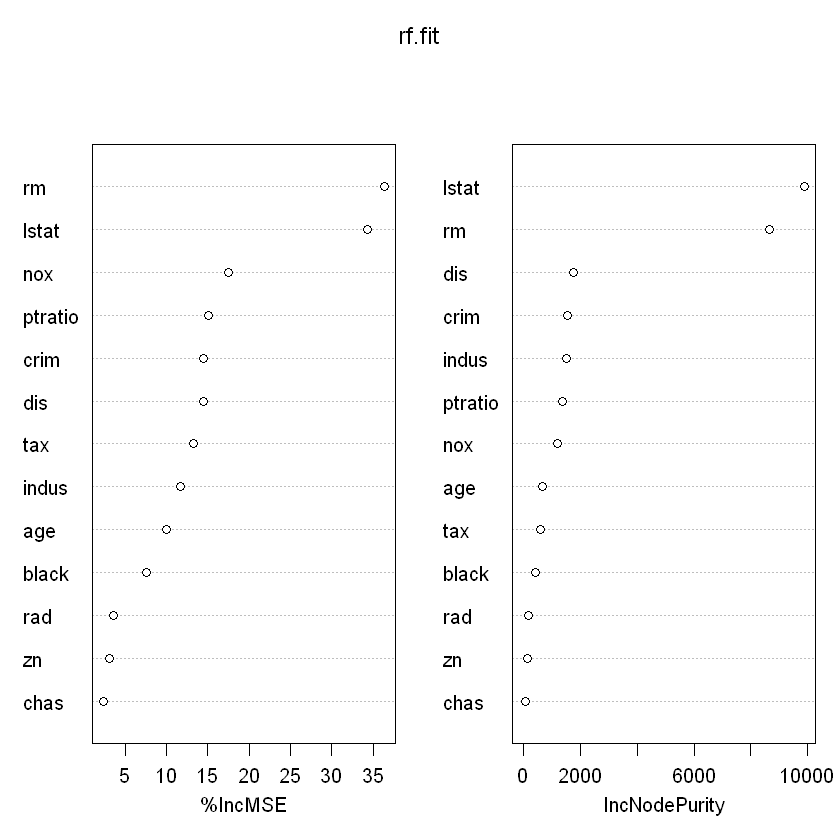

In [120]:
varImpPlot(rf.fit)

In [122]:
rf.yhat = predict(rf.fit, newdata = Boston_test)
mean((rf.yhat - Boston_test$medv)^2)

[1] 12.26042

In [123]:
kk = mean((rf.yhat - Boston_test$medv)^2)
sqrt(kk)

[1] 3.501488

# 자율학습 모델(unsupervised Model)

## K - means Model method

In [132]:
iris2 = iris[, 1:4]
head(iris2)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


In [133]:
km.out.withness = c()
km.out.between = c()

In [136]:
kk = c()

In [139]:
for(i in 2:7){
    set.seed(1)
    km.out = kmeans(iris2, center = i)
    km.out.withness[i - 1] = km.out$tot.withinss
    km.out.between[i - 1] = km.out$betweenss
    kk = c(kk, (paste0('k=', i)))
}

In [145]:
tt = data.frame(km.out.withness, km.out.between)
tt

km.out.withness,km.out.between
152.34795,529.0226
78.85144,602.5192
71.44525,609.9254
49.82228,631.5483
42.42155,638.9491
40.63219,640.7384


Warning message in plot.window(...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in plot.xy(xy, type, ...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in axis(side = side, at = at, labels = labels, ...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in axis(side = side, at = at, labels = labels, ...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in box(...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in title(...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in plot.window(...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in plot.xy(xy, type, ...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in axis(side = side, at = at, labels = labels, ...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in axis(side = side, at = at, labels = labels, ...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in box(...):
""kk"는 그래픽 매개변수가 아닙니다"Warning message in title(...):
""kk"는 그래픽 매개변수가 아닙니다"

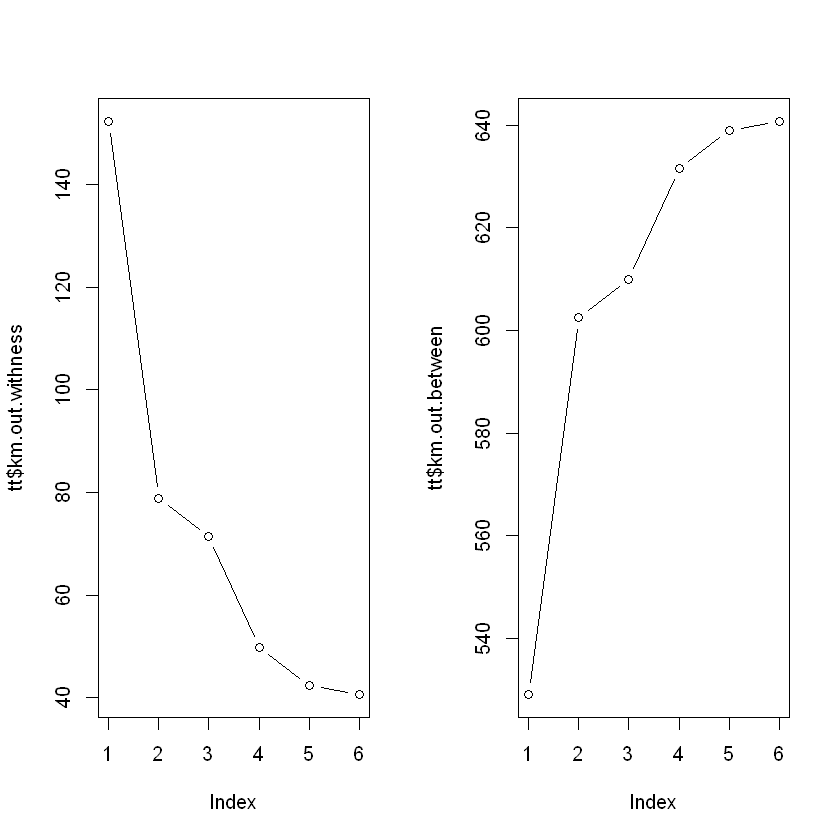

In [146]:
par(mfrow = c(1, 2))
plot(kk = c(1:7), tt$km.out.withness, type = 'b')
plot(kk = c(1:7), tt$km.out.between, type = 'b')

In [147]:
km.out.k3 = kmeans(iris2, centers = 3)
km.out.k3$centers

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
6.850000,3.073684,5.742105,2.071053
5.901613,2.748387,4.393548,1.433871
5.006000,3.428000,1.462000,0.246000


In [148]:
km.out.k3$cluster

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
[112] 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
[149] 1 2

In [149]:
km.out.k3$size

[1] 38 62 50

In [150]:
table(km.out.k3$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0          2        36
  2      0         48        14
  3     50          0         0

ERROR: Error in point(km.out.k3$centers, col = 1:3, pch = 16, 17, 18, cex = 5): 함수 "point"를 찾을 수 없습니다


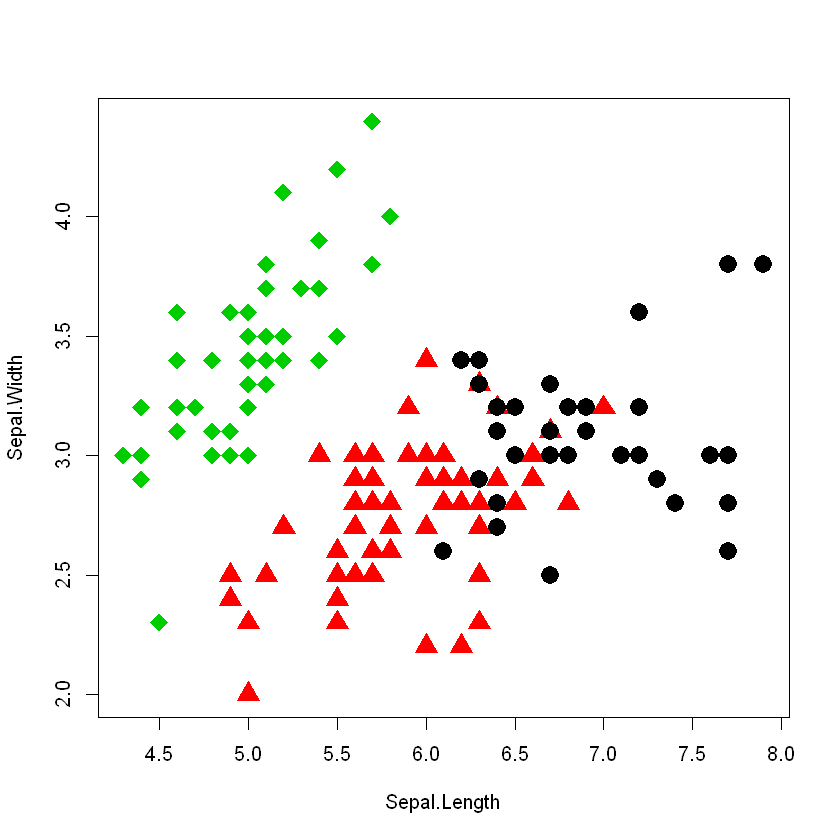

In [154]:
plot(iris2[,1:2], col = km.out.k3$cluster, pch = ifelse(km.out.k3$cluster == 1, 16, ifelse(km.out.k3$cluster == 2, 17, 18)), cex = 2)
point(km.out.k3$centers, col = 1:3, pch = 16, 17, 18, cex = 5)

# USArrests

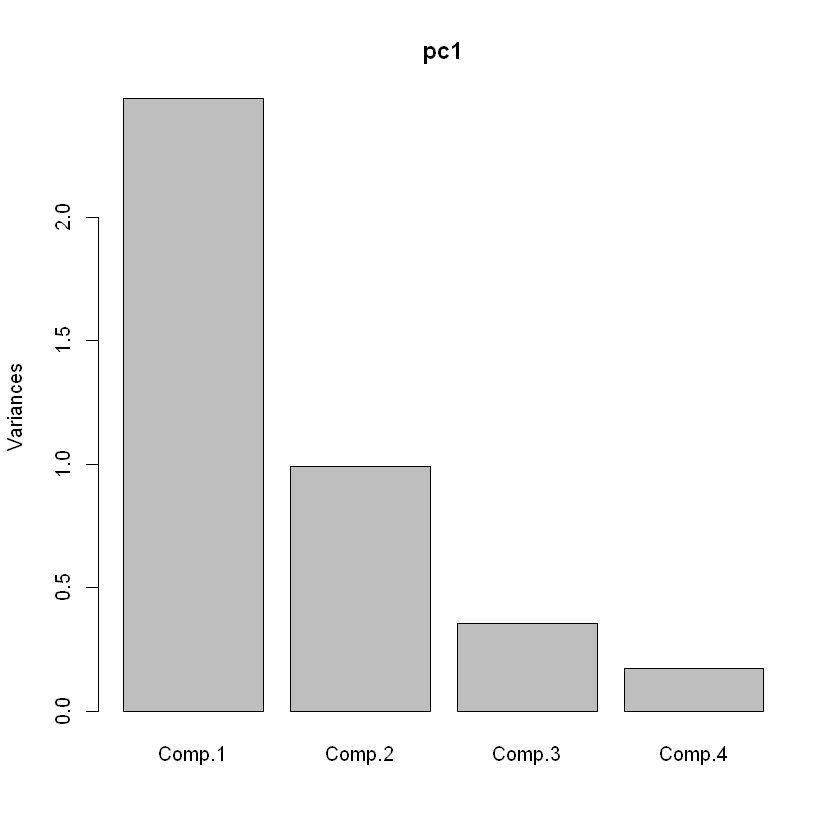

In [155]:
pc1 = princomp(USArrests, cor = T)
plot(pc1)

In [156]:
summary(pc1)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

In [157]:
pc1$center

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [159]:
# 표준편차
pc1$scale

Murder   Assault  UrbanPop      Rape 
 4.311735 82.500075 14.329285  9.272248

In [161]:
pc1$loadings


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

In [162]:
pc1$scores

,Comp.1,Comp.2,Comp.3,Comp.4
Alabama,0.98556588,1.13339238,0.44426879,0.156267145
Alaska,1.95013775,1.07321326,-2.04000333,-0.438583440
Arizona,1.76316354,-0.74595678,-0.05478082,-0.834652924
Arkansas,-0.14142029,1.11979678,-0.11457369,-0.182810896
California,2.52398013,-1.54293399,-0.59855680,-0.341996478
Colorado,1.51456286,-0.98755509,-1.09500699,0.001464887
Connecticut,-1.35864746,-1.08892789,0.64325757,-0.118469414
Delaware,0.04770931,-0.32535892,0.71863294,-0.881977637
Florida,3.01304227,0.03922851,0.57682949,-0.096284752
Georgia,1.63928304,1.27894240,0.34246008,1.076796812


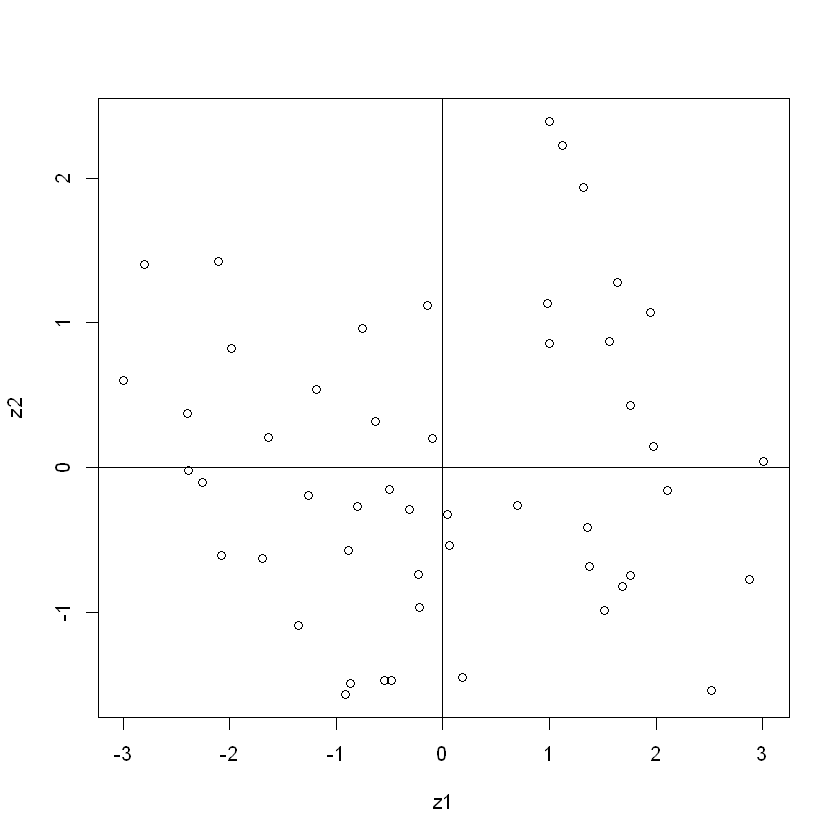

In [163]:
plot(pc1$scores[,1], pc1$scores[,2], xlab = 'z1', ylab = 'z2')
abline(v = 0, h = 0)

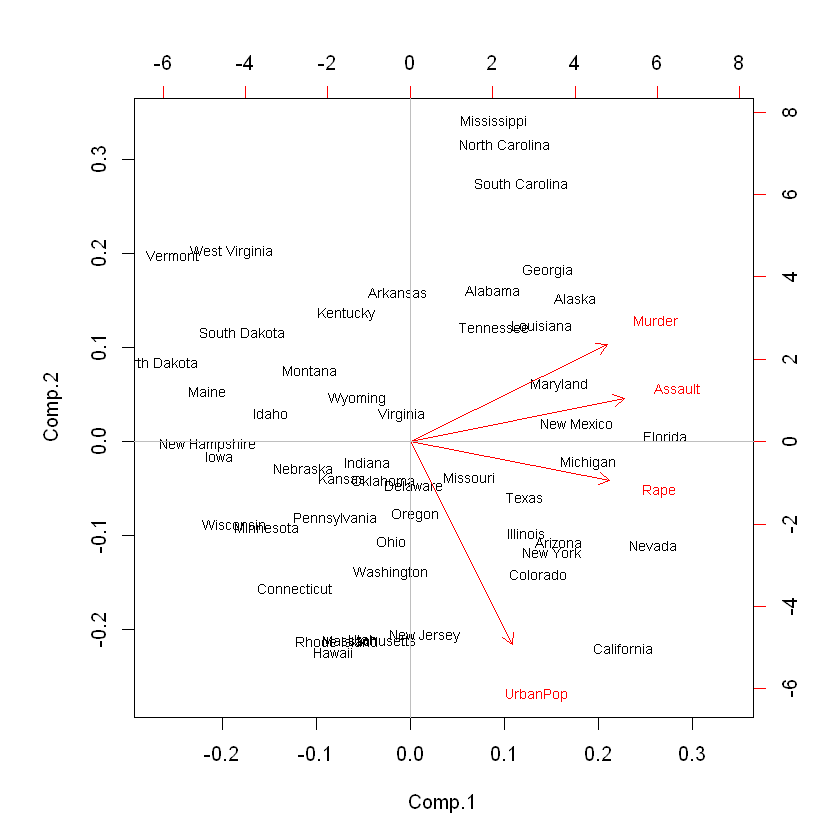

In [164]:
biplot(pc1, cex = 0.7)
abline(v = 0, h = 0, col = 'gray')